In [1]:
#importing librabries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
torch.cuda.is_available()

True

In [5]:
torch.cuda.current_device()

0

In [7]:
torch.cuda.get_device_name(0)

'GeForce GTX 1650'

### Linear Regression

In [8]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [9]:
# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [13]:
print(X[:10]), print(y[:10])

tensor([[-1.3475],
        [ 0.3523],
        [ 0.9547],
        [ 0.0359],
        [ 0.0480],
        [ 0.0486],
        [ 0.7233],
        [ 0.8021],
        [-1.1438],
        [ 0.1794]])
tensor([-126.2492,   50.9288,   63.1546,    6.0547,   -5.7295,   -2.7519,
          58.7036,   53.8136,  -95.3411,   24.6481])


(None, None)

In [14]:
y = y.view(y.shape[0], 1)
print(y[:10])

tensor([[-126.2492],
        [  50.9288],
        [  63.1546],
        [   6.0547],
        [  -5.7295],
        [  -2.7519],
        [  58.7036],
        [  53.8136],
        [ -95.3411],
        [  24.6481]])


In [15]:
n_samples, n_features = X.shape

In [16]:
print(X.shape)

torch.Size([100, 1])


In [17]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
model

Linear(in_features=1, out_features=1, bias=True)

In [18]:
# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [19]:
model.parameters()

<generator object Module.parameters at 0x000001B1F844E048>

In [20]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4114.8354
epoch: 20, loss = 2897.8750
epoch: 30, loss = 2068.5073
epoch: 40, loss = 1503.1646
epoch: 50, loss = 1117.7120
epoch: 60, loss = 854.8544
epoch: 70, loss = 675.5631
epoch: 80, loss = 553.2466
epoch: 90, loss = 469.7828
epoch: 100, loss = 412.8198


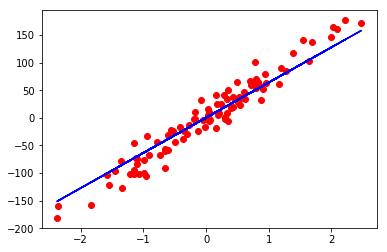

In [21]:
# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

### Logistic Regression

In [22]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
# 0) Prepare data
bc = datasets.load_breast_cancer()
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [24]:
X, y = bc.data, bc.target

In [25]:
X.shape, y.shape

((569, 30), (569,))

In [26]:
n_samples, n_features = X.shape

In [31]:
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [32]:
y[:5]

array([0, 0, 0, 0, 0])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [36]:
y_train = y_train.view(y_train.shape[0], 1)# reshaping the data to one col.
y_test = y_test.view(y_test.shape[0], 1)

In [37]:
# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

In [41]:
model

Model(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)

In [42]:
# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()#applying binary cross entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [43]:
# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 0.7023
epoch: 20, loss = 0.5597
epoch: 30, loss = 0.4750
epoch: 40, loss = 0.4191
epoch: 50, loss = 0.3791
epoch: 60, loss = 0.3487
epoch: 70, loss = 0.3248
epoch: 80, loss = 0.3053
epoch: 90, loss = 0.2890
epoch: 100, loss = 0.2752


In [44]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9737
